## Read image and converting it into low pixels


In [ ]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
% matplotlib inline
import cv2


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving MultiIKONOS.tiff to MultiIKONOS.tiff


In [ ]:
image = img.imread("MultiIKONOS.tiff")

In [ ]:
image.shape

(828, 885, 4)

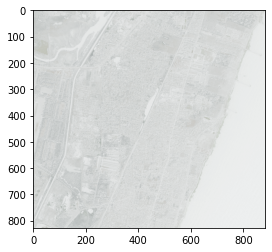

In [ ]:
plt.imshow(image)

In [ ]:
import numpy as np
np.ndim(image)

3

In [ ]:
print(image.shape)

(828, 885, 4)


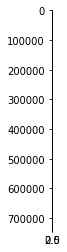

In [ ]:
duplicate_image = image.reshape((828*885),4)
plt.imshow(duplicate_image)

In [ ]:
# let's store the r,g,b value
r,g,b,y = [],[],[],[]
for row in image:
  for red, green, blue,yw in row:
    r.append(red)
    g.append(green)
    b.append(blue)
    y.append(yw)

In [ ]:
df = pd.DataFrame({'red' :r,'green':g,'blue':b,'yw':y})
df.head()

,red,green,blue,yw
0,0,0,0,0
1,37,53,52,51
2,40,55,53,61
3,41,56,53,55
4,45,59,53,64


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
inertia =[]
num_cluster = range(1,15)
from tqdm import tqdm
for i in tqdm(num_cluster):
  model= KMeans(n_clusters=i)
  model.fit(df)
  distortions.append(sum(np.min(cdist(df,model.cluster_centers_,'euclidean'),axis=1)) /df.shape[0])

100%|██████████| 14/14 [07:34<00:00, 32.48s/it]


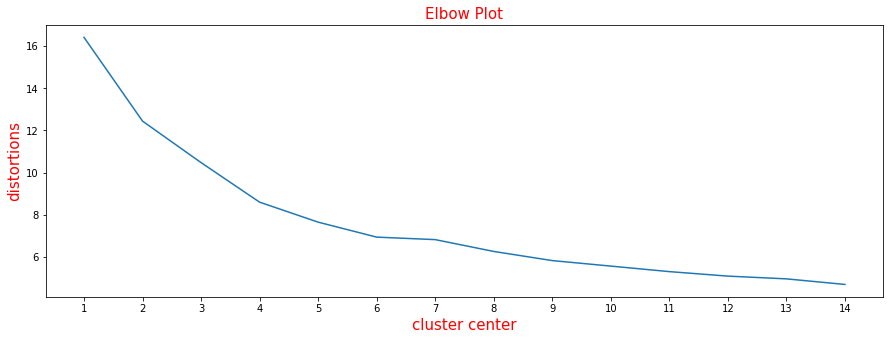

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(num_cluster,distortions)
plt.xticks(ticks=range(1,15))
plt.title("Elbow Plot",fontdict={'fontsize':15,'color': 'red'})
plt.xlabel('cluster center',fontdict={'fontsize':15,'color': 'red'})
plt.ylabel('distortions',fontdict={'fontsize':15,'color': 'red'})
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters = 5)
kmeans_model.fit(duplicate_image)
print(kmeans_model.cluster_centers_)


[[36.85267847 57.73427821 53.47416159 24.0707417 ]
 [50.35247422 59.75329088 52.22965166 53.85838194]
 [36.91999182 49.78574709 47.19802245 40.57765734]
 [76.28359643 85.81173644 68.92278655 72.28160604]
 [35.62167723 49.37258246 46.3742199  60.07357975]]


In [ ]:
colors = np.asarray(kmeans_model.cluster_centers_,dtype='uint8')
colors

array([[36, 57, 53, 24],
       [50, 59, 52, 53],
       [36, 49, 47, 40],
       [76, 85, 68, 72],
       [35, 49, 46, 60]], dtype=uint8)

In [ ]:
#! pip install webcolors
import webcolors
colors_classifier = ['red','green','yellow','pink','orange']
new_colors = []
for colors in colors_classifier:
 new_colors.append(webcolors.name_to_rgb(colors))
new_colors


[IntegerRGB(red=255, green=0, blue=0),
 IntegerRGB(red=0, green=128, blue=0),
 IntegerRGB(red=255, green=255, blue=0),
 IntegerRGB(red=255, green=192, blue=203),
 IntegerRGB(red=255, green=165, blue=0)]

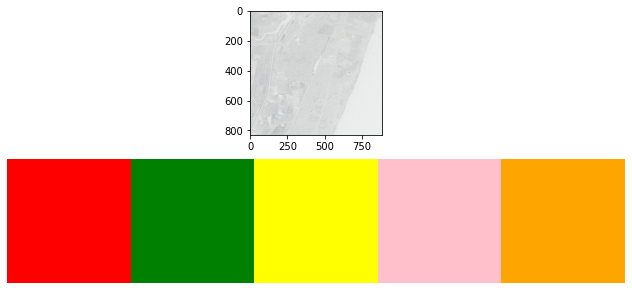

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.imshow(image)

plt.subplot(2,1,2)
plt.axis('off')
plt.imshow([new_colors])

In [ ]:
labels_counts = np.unique(kmeans_model.labels_,return_counts=True)[1]
percentage_labels_counts = labels_counts/duplicate_image.shape[0]*100

In [ ]:
percentage_labels_counts

array([18.74682715, 24.50039575, 32.66723983,  1.98245039, 22.10308687])

<BarContainer object of 5 artists>

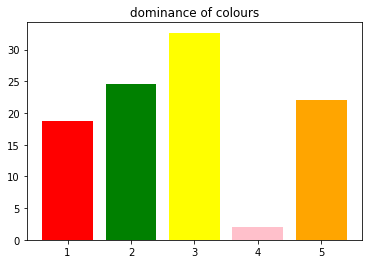

In [ ]:
plt.title('dominance of colours')
plt.bar(range(1,6),percentage_labels_counts,color = np.array(new_colors)/255,)

In [ ]:
kmeans_model.labels_

array([2, 4, 4, ..., 0, 0, 0], dtype=int32)

In [ ]:
#new_colors.index(0)
print([new_colors[0].red/255,new_colors[0].green])

[1.0, 0]


In [ ]:
p = np.zeros((828*885,3))
for i in range(duplicate_image.shape[0]):
  a = new_colors[kmeans_model.labels_[i]]
  p[i] = [a.red/255,a.green/255,a.blue/255]

In [ ]:
image.shape

(828, 885, 4)

In [ ]:
generated_image = p.reshape(828,-1,3)

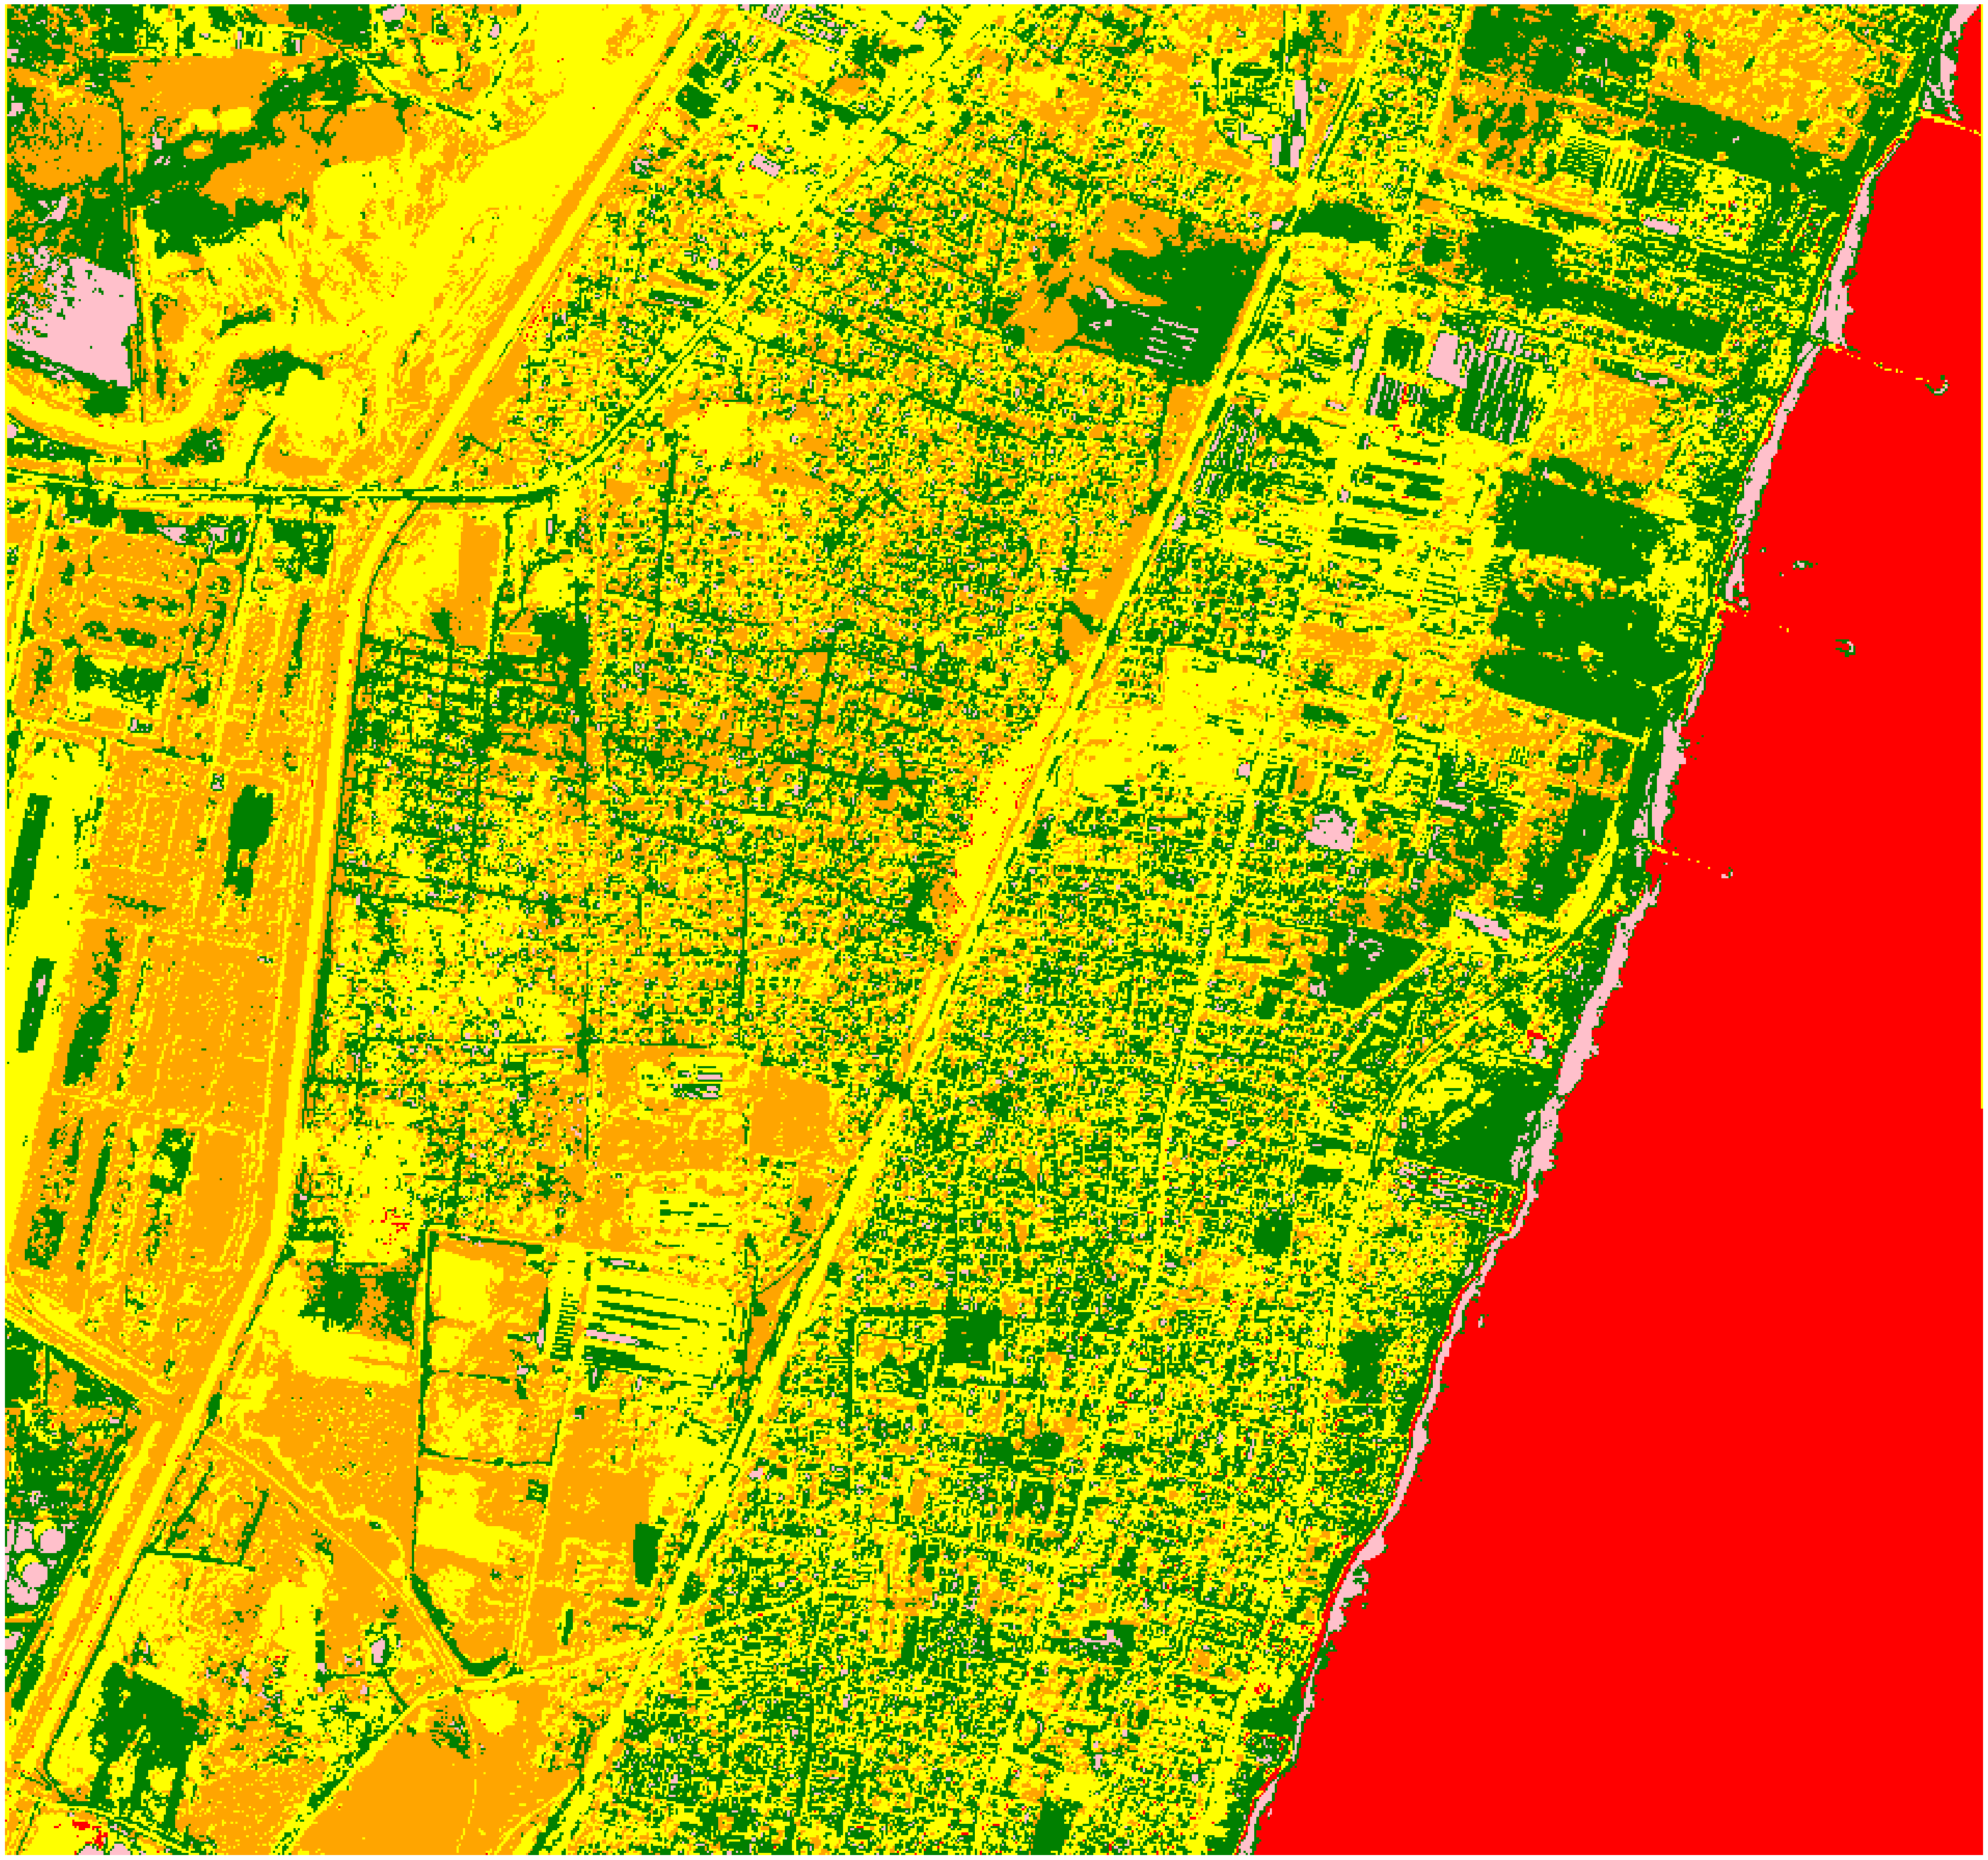

In [ ]:
plt.figure(figsize=(50,50))
plt.axis('off')
plt.imshow(generated_image)

In [ ]:
generated_image.shape

(720, 1280, 3)